# MATH 382 - Fall 2021
## Scientific Computing
Nicholas Zermeno
<hr>

# Lab Assignment #3: Linear Regression and Optimization

<hr>

## Lab Description

In this lab we will use least squares to fit linear data. We will use four different methods for the least squares fitting, after setting up the overdetermined system $X\alpha = {\bf y}$, will find the best linear fit ${\bf \alpha}$ by:

<ol>
<li>Solving the normal equations $X^TX\alpha = X^T{\bf y}$.</li><br>
<li>Minimizing the objective function $f(\alpha) = \frac{1}{n} \| X \alpha - {\bf y} \|_2^2$ using gradient descent</li><br>
<li>Minimizing the above objective function with the additional constraint $\| \alpha \|_2^2 \leq 1$ using both of the above methods with Lagrange multipliers</li><br>
<li>Minimizing the above objective function with the additional constraint $\| \alpha \|_1 \leq 1$ using both of the above methods with Lagrange multipliers</li>
</ol>

This will allow us to write a model $\ell(x) = ax + b$ where $(a, b) = \alpha$ is the least squares solution of the system $X \alpha = {\bf y}$. We will plot the line obtained with the different methods, observe how well each line fits the data, and compare the results obtained with the different methods and their computational cost (CPU times). <br>


<hr>


<hr>

## <tt>import</tt> Python Packages

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import time

<hr>

## Problem \#1

Load the data, verify its dimensions $300 \times 2$, and set up the coefficient matrix $X$ and the vector ${\bf y}$. 
You may want to verify the dimensions of the coefficient matrix $X$ and the vector ${\bf y}$ too.

<hr>

In [2]:
data = np.loadtxt('data/dataLS.txt', delimiter = ',')
print(data.shape)
print(data[0:10,:])

X = np.zeros([300,2])
X[:,0] = data[:,0]
X[:,1] = np.ones(300)
print(X.shape)

x = data[:,0]
y = data[:,1]
print(y.shape)

(300, 2)
[[-0.475858    1.61655   ]
 [-0.291753    0.184802  ]
 [-0.156001    0.518786  ]
 [-0.155835    0.175825  ]
 [-0.0830172   0.716709  ]
 [-0.0378482  -0.175242  ]
 [-0.0354125  -0.419593  ]
 [-0.031637   -0.175356  ]
 [-0.0278986   0.766967  ]
 [-0.00824979  1.288     ]]
(300, 2)
(300,)


<hr>

## Problem \#2

Plot the data $(x_i, y_i)$

<hr>

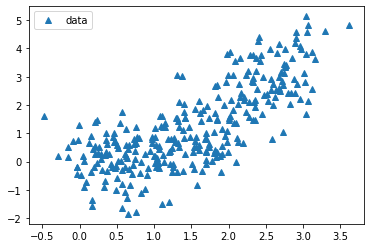

In [5]:
fig2, ax2 = plt.subplots()

ax2.plot(x, y, '^', label = "data")
ax2.legend()

<hr>

## Problem \#3

Find the least squares solution of the system $X{\bf \alpha} = {\bf y}$ using the Moore-Penrose pseudo inverse of $X$, $X^+$, using the Singular Value Decomposition of $X$, print the solution, plot the solution $y_{fit} = ax + b$ on top of the data, and find out the time it takes Python to compute the solution.<br>

<hr>

slope of linear model: 1.2204949901439193
y-intercept of linear model: -0.5877619479616362
cpu time to solve for a and b: 0.0 s 

Mean squared error: MSE =  0.898261251159575


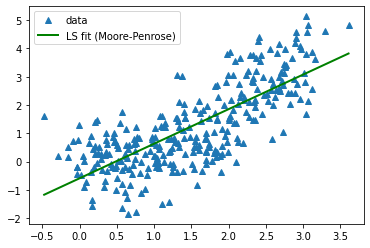

In [6]:
t_start_LS = time.process_time()

U, s, Vt = LA.svd(X)

S = np.diag(s)
Z = np.zeros((X.shape[0] - X.shape[1], X.shape[1]))
S = np.vstack((S, Z))
sp = np.zeros(s.shape)

for i in range(0, s.shape[0]):
    if s[i] == 0.0:
        sp[i] = 0.0
    else:
        sp[i] = s[i]**-1 

Sp = np.diag(sp)
Z = np.zeros((X.shape[1], X.shape[0] - X.shape[1]))
Sp = np.hstack((Sp, Z))
Xp = np.dot(Vt.T, np.dot(Sp, U.T))
        
alpha = np.dot(Xp, y)

t_LS = time.process_time() - t_start_LS

a_LS = np.asarray(alpha).reshape(-1)[0]
b_LS = np.asarray(alpha).reshape(-1)[1]

print('slope of linear model:', a_LS) 
print('y-intercept of linear model:', b_LS)
print('cpu time to solve for a and b:', t_LS, 's \n')
print('Mean squared error: MSE = ', LA.norm(y - X.dot(np.array([a_LS, b_LS])))**2/X.shape[0])

X_sort = np.sort(X,0)
y_LS = X_sort.dot(np.array([a_LS,b_LS]))

fig3, ax3 = plt.subplots()

ax3.plot(x, y, '^', label = "data")
ax3.plot(X_sort[:,0], y_LS, 'g', lw = 2, label = "LS fit (Moore-Penrose)")
ax3.legend()

In [7]:
print('Using NumPy method:','\n', np.linalg.pinv(X)[0:10,0:10])
print('Using worked out method:','\n', Xp[0:10,0:10])

Using NumPy method: 
 [[-0.00800683 -0.0072586  -0.00670689 -0.00670621 -0.00641027 -0.0062267
  -0.0062168  -0.00620146 -0.00618626 -0.00610641]
 [ 0.01529763  0.01417959  0.01335518  0.01335417  0.01291196  0.01263765
   0.01262286  0.01259993  0.01257723  0.01245791]]
Using worked out method: 
 [[-0.00800683 -0.0072586  -0.00670689 -0.00670621 -0.00641027 -0.0062267
  -0.0062168  -0.00620146 -0.00618626 -0.00610641]
 [ 0.01529763  0.01417959  0.01335518  0.01335417  0.01291196  0.01263765
   0.01262286  0.01259993  0.01257723  0.01245791]]


<hr>

## Problem \#4

Find the best fit by minimizing the objective function $f(\alpha) = \frac{1}{n} \|X \alpha - {\bf y} \|_2^2$ using gradient descent.<br>
<br>

<hr>

slope of linear model: a =  1.2204949793392035 

y-intercept of linear model: b =  -0.5877619274306493 

cpu time to solve for a and b: t_GD =  0.015625 s 

number of iterations: k =  412 

Mean squared error: MSE =  0.8982612511595753 

alpha_norm =  1.3546483226022887 



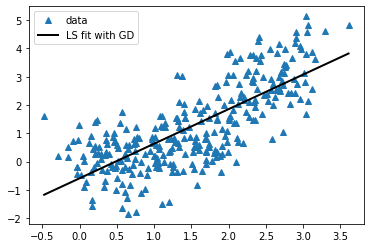

In [8]:
def fobj(alpha, X, y):
    n = X.shape[0]
    return (LA.norm(X.dot(alpha) - y)**2)/n

def gradf(alpha, X, y):
    n = X.shape[0]
    return -2.0*(X.T.dot(y) - (X.T.dot(X)).dot(alpha))/n

t_start_GD = time.process_time()
gamma = 1.0e-1
tau = 1.0e-8
alphak = np.ones(2)
k = 0
kmax = 1000
fk = fobj(alphak, X, y)
gradk = gradf(alphak, X, y)

while fk > 1.0e-12 and k < kmax and LA.norm(gradk) > tau:
    alphak = alphak - gamma*gradk
    fk = fobj(alphak, X, y)
    gradk = gradf(alphak, X, y)
    k += 1
    
t_GD = time.process_time() - t_start_GD

print('slope of linear model: a = ', alphak[0], '\n')
print('y-intercept of linear model: b = ', alphak[1], '\n')

print('cpu time to solve for a and b: t_GD = ', t_GD, 's \n')

print('number of iterations: k = ', k, '\n')

print('Mean squared error: MSE = ', LA.norm(y - X.dot(alphak))**2/X.shape[0], '\n')

print('alpha_norm = ', np.sqrt(alphak.T.dot(alphak)), '\n')

X_sort = np.sort(X,0)
y_GD = X_sort.dot(alphak)

fig4, ax4 = plt.subplots()

ax4.plot(x, y, '^', label = "data")
ax4.plot(X_sort[:,0], y_GD, 'k', lw = 2, label = "LS fit with GD")
ax4.legend()

<hr>

## Problem \#5

<b>Ridge Regression:</b> Find the best fit by minimizing the objective function $f(\alpha) = \frac{1}{n} \|X \alpha - {\bf y} \|_2^2$ subject to the constraint $\| \alpha \|_2^2\leq 1$ using gradient descent on the Lagrangian of $f(\alpha)$. <br>

<hr>

slope: a =  1.2204949793392035
y-intercept: b =  -0.5877619274306493
cpu time:  0.015625 s
number of iterations k =  412
Mean squared error: MSE =  0.8982612511595753


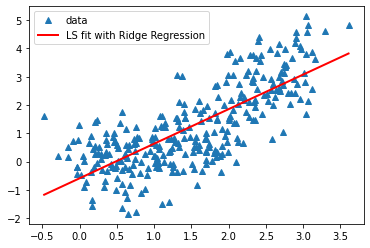

In [11]:
def LobjR(X, alpha, y, s):
    n = X.shape[0]
    return (LA.norm(X.dot(alpha) - y)**2)/n + s*LA.norm(alpha)**2

def gradLR(X,alpha,y,s):
    n = X.shape[0]
    XT = X.T
    return -2.0*(X.T.dot(y) - (X.T.dot(X)).dot(alpha))/n + np.dot(2*s,alpha)

t_start_R = time.process_time()
s = 0.0
gamma = 1.0e-1
delta = 1.0e-8
alphak = np.ones(2)
k = 0
kmax = 1000
b = s

Lk = LobjR(X, alphak, y, s)
gradk = gradLR(X,alphak,y,s)

while Lk > 1.0e-14 and k < kmax and LA.norm(gradk) > tau:
    alphak = alphak - gamma*gradk
    Lk = LobjR(X, alphak, y, s)
    gradk = gradLR(X, alphak, y, s)
    k +=1
    
t_R = time.process_time() - t_start_R

a_R = alphak[0]
b_R = alphak[1]
X_sort = np.sort(X,0)
y_R = X_sort.dot(alphak)


print('slope: a = ', a_R)
print('y-intercept: b = ', b_R)

print('cpu time: ', t_R, 's')

print('number of iterations k = ', k)

print('Mean squared error: MSE = ', LA.norm(y - X.dot(alphak))**2/X.shape[0])

fig5, ax5 = plt.subplots()

ax5.plot(x, y, '^', label = "data")
ax5.plot(X_sort[:,0], y_R, 'r', lw = 2, label = "LS fit with Ridge Regression")
ax5.legend()

slope: a =  1.0407422648349938
y-intercept: b =  -0.290149354089768
cpu time:  0.015625 s
number of iterations l =  280
Mean squared error: MSE =  0.9256040888687752


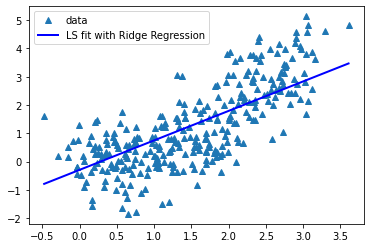

In [225]:
t_start_R2 = time.process_time()
s = 0.1
gamma = 1.0e-1
delta = 1.0e-8
alphak2 = np.ones(2)
l = 0
lmax = 1000

Lk2 = LobjR(X,alphak2,y,s)
gradk2 = gradLR(X,alphak2,y,s)

while Lk2 > 1.0e-14 and l < lmax and LA.norm(gradk2) > tau:
    alphak2 = alphak2 - gamma*gradk2
    Lk = LobjR(X, alphak2, y, s)
    gradk2 = gradLR(X, alphak2, y, s)
    l +=1
    
t_R2 = time.process_time() - t_start_R2

a_R2 = alphak2[0]
b_R2 = alphak2[1]
X_sort = np.sort(X,0)
y_R2 = X_sort.dot(alphak2)

print('slope: a = ', a_R2)
print('y-intercept: b = ', b_R2)

print('cpu time: ', t_R2, 's')

print('number of iterations l = ', l)

print('Mean squared error: MSE = ', LA.norm(y - X.dot(alphak2))**2/X.shape[0])

fig5, ax5 = plt.subplots()

ax5.plot(x, y, '^', label = "data")
ax5.plot(X_sort[:,0], y_R2, 'b', lw = 2, label = "LS fit with Ridge Regression")
ax5.legend()

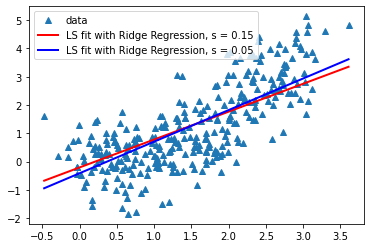

In [219]:
fig5, ax5 = plt.subplots()

ax5.plot(x, y, '^', label = "data")
ax5.plot(X_sort[:,0], y_R, 'r', lw = 2, label = f"LS fit with Ridge Regression, s = {b}")
ax5.plot(X_sort[:,0], y_R2, 'b', lw = 2, label = f"LS fit with Ridge Regression, s = {s}")
ax5.legend()

<hr>

## Problem \#6

<b>Lasso Regression:</b> Find the best fit by minimizing the objective function $f(\alpha) = \frac{1}{n} \|X \alpha - {\bf y} \|_2^2$ subject to the constraint $\| \alpha \|_1\leq 1$ using gradient descent on the Lagrangian of $f(\alpha)$.<br>

<hr>

slope: a =  1.068439791346862
y-intercept: b =  -0.31055164888287273
cpu time:  0.015625 s
number of iterations k =  396
Mean squared error: MSE =  0.9197245275906598


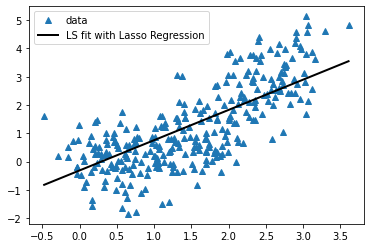

In [220]:
def LobjL(X,alpha,y,s):
    n = X.shape[0]
    return (LA.norm(X.dot(alpha) - y)**2)/n + s*LA.norm(alpha, 1)

def gradLL(X,alpha,y,s):
    n = X.shape[0]
    XT = X.T
    return -2.0*(X.T.dot(y) - (X.T.dot(X)).dot(alpha))/n + s*np.sign(alpha)

t_start_L = time.process_time()
s = 0.1
gamma = 1.0e-1
delta = 1.0e-8
alphak = np.ones(2)
k = 0
kmax = 1000
b = s

Lk = LobjL(X,alphak,y,s)
gradk = gradLL(X,alphak,y,s)

while Lk > 1.0e-14 and k < kmax and LA.norm(gradk) > tau:
    alphak = alphak - gamma*gradk
    Lk = LobjL(X, alphak, y, s)
    gradk = gradLL(X, alphak, y, s)
    k +=1
    
t_L = time.process_time() - t_start_L

a_L = alphak[0]
b_L = alphak[1]
X_sort = np.sort(X,0)
y_L = X_sort.dot(alphak)

print('slope: a = ', a_L)
print('y-intercept: b = ', b_L)

print('cpu time: ', t_L, 's')

print('number of iterations k = ', k)

print('Mean squared error: MSE = ', LA.norm(y - X.dot(alphak))**2/X.shape[0])

fig6, ax6 = plt.subplots()

ax6.plot(x, y, '^', label = "data")
ax6.plot(X_sort[:,0], y_L, 'k', lw = 2, label = "LS fit with Lasso Regression")
ax6.legend()

slope: a =  1.068439791346862
y-intercept: b =  -0.31055164888287273
cpu time:  0.015625 s
number of iterations l =  396
Mean squared error: MSE =  0.9197245275906598


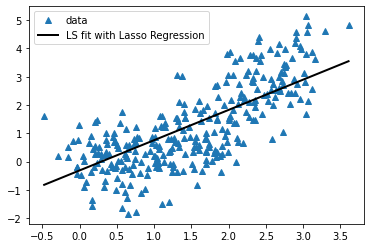

In [224]:
t_start_L2 = time.process_time()
s = 0.1
gamma = 1.0e-1
delta = 1.0e-8
alphak2 = np.ones(2)
l = 0
lmax = 1000

Lk2 = LobjL(X,alphak2,y,s)
gradk2 = gradLL(X,alphak2,y,s)

while Lk2 > 1.0e-14 and l < lmax and LA.norm(gradk2) > tau:
    alphak2 = alphak2 - gamma*gradk2
    Lk2 = LobjL(X, alphak2, y, s)
    gradk2 = gradLL(X, alphak2, y, s)
    l +=1
    
t_L2 = time.process_time() - t_start_L2

a_L2 = alphak2[0]
b_L2 = alphak2[1]
X_sort = np.sort(X,0)
y_L2 = X_sort.dot(alphak2)

print('slope: a = ', a_L2)
print('y-intercept: b = ', b_L2)

print('cpu time: ', t_L2, 's')

print('number of iterations l = ', l)

print('Mean squared error: MSE = ', LA.norm(y - X.dot(alphak2))**2/X.shape[0])

fig6, ax6 = plt.subplots()

ax6.plot(x, y, '^', label = "data")
ax6.plot(X_sort[:,0], y_L2, 'k', lw = 2, label = "LS fit with Lasso Regression")
ax6.legend()

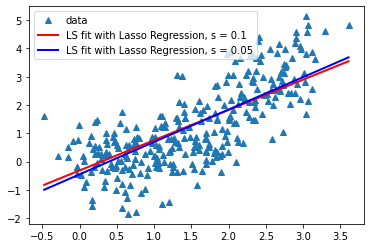

In [222]:
fig5, ax5 = plt.subplots()

ax5.plot(x, y, '^', label = "data")
ax5.plot(X_sort[:,0], y_L, 'r', lw = 2, label = f"LS fit with Lasso Regression, s = {b}")
ax5.plot(X_sort[:,0], y_L2, 'b', lw = 2, label = f"LS fit with Lasso Regression, s = {s}")
ax5.legend()

<hr>

## Problem \#7

Plot the data and the all four solutions on the same window.

<hr>

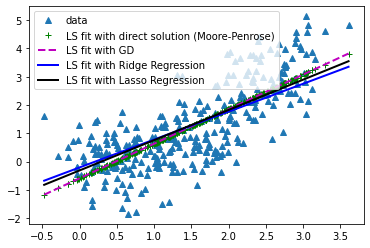

In [223]:
fig7, ax7 = plt.subplots()

ax7.plot(x, y, '^', label = "data")
ax7.plot(X_sort[:,0], y_LS, '+g', lw = 2, label = "LS fit with direct solution (Moore-Penrose)")
ax7.plot(X_sort[:,0], y_GD, '--m', lw = 2, label = "LS fit with GD")
ax7.plot(X_sort[:,0], y_R, 'b', lw = 2, label = "LS fit with Ridge Regression")
ax7.plot(X_sort[:,0], y_L, 'k', lw = 2, label = "LS fit with Lasso Regression")

ax7.legend()